In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset From Kaggle

In [ ]:
#Install Kaggle
!pip install kaggle

In [ ]:
#Upload you API token kaggle.json:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aunkonhabib","key":"2d3e7b51eb26e556a68b34641794c92b"}'}

In [ ]:
#Create a directory kaggle
!mkdir ~/.kaggle

In [ ]:
#Copy kaggle.json file
!cp kaggle.json ~/.kaggle/

In [ ]:
#Grant Permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download dataset
! kaggle datasets download  masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0


In [ ]:
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

# Load Train Data

In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df


In [ ]:
tr_df = train_df('/content/Training')
tr_df

Class Path       Class
0     /content/Training/meningioma/Tr-me_0643.jpg  meningioma
1     /content/Training/meningioma/Tr-me_1021.jpg  meningioma
2     /content/Training/meningioma/Tr-me_1208.jpg  meningioma
3     /content/Training/meningioma/Tr-me_0868.jpg  meningioma
4     /content/Training/meningioma/Tr-me_0315.jpg  meningioma
...                                           ...         ...
5707   /content/Training/pituitary/Tr-pi_0169.jpg   pituitary
5708   /content/Training/pituitary/Tr-pi_1210.jpg   pituitary
5709   /content/Training/pituitary/Tr-pi_0088.jpg   pituitary
5710   /content/Training/pituitary/Tr-pi_1266.jpg   pituitary
5711   /content/Training/pituitary/Tr-pi_0799.jpg   pituitary

[5712 rows x 2 columns]

# Load Test Data

---



In [ ]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [ ]:
ts_df = test_df('/content/Testing')
ts_df

Class Path       Class
0     /content/Testing/meningioma/Te-me_0151.jpg  meningioma
1     /content/Testing/meningioma/Te-me_0100.jpg  meningioma
2     /content/Testing/meningioma/Te-me_0064.jpg  meningioma
3     /content/Testing/meningioma/Te-me_0084.jpg  meningioma
4     /content/Testing/meningioma/Te-me_0223.jpg  meningioma
...                                          ...         ...
1306   /content/Testing/pituitary/Te-pi_0152.jpg   pituitary
1307   /content/Testing/pituitary/Te-pi_0252.jpg   pituitary
1308   /content/Testing/pituitary/Te-pi_0228.jpg   pituitary
1309   /content/Testing/pituitary/Te-pi_0104.jpg   pituitary
1310   /content/Testing/pituitary/Te-pi_0253.jpg   pituitary

[1311 rows x 2 columns]

# Number of images in each class in train data

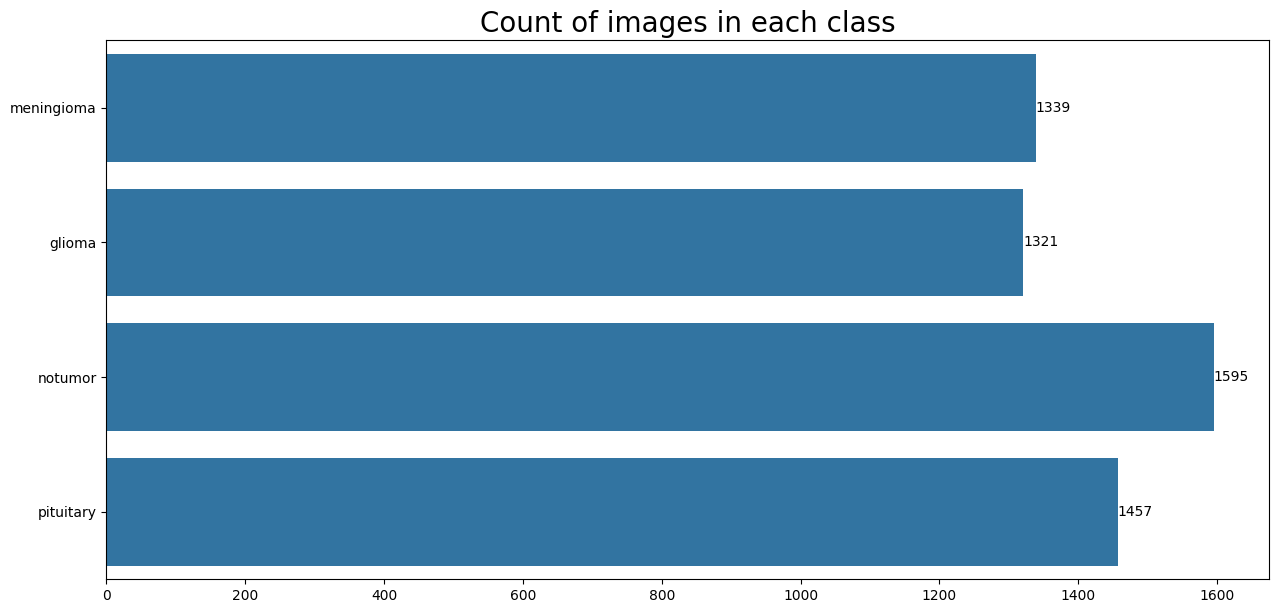

In [ ]:

plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

# Count each class in test data

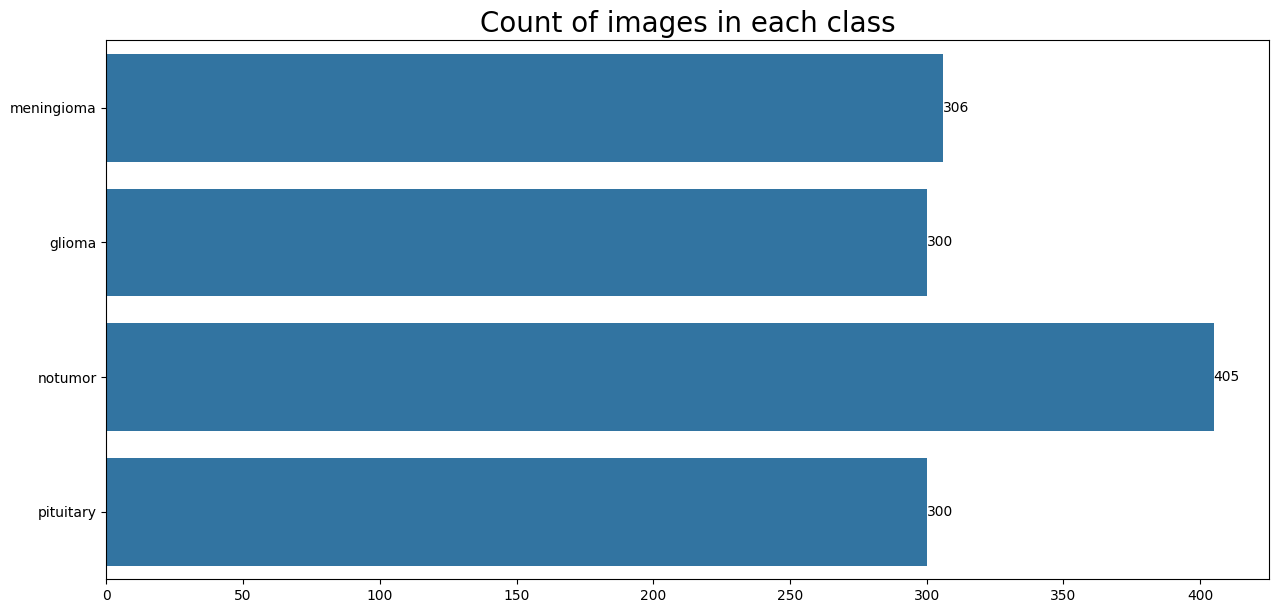

In [ ]:

plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

#  Split data into train, test, valid

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])
valid_df

Class Path       Class
592       /content/Testing/glioma/Te-gl_0040.jpg      glioma
18    /content/Testing/meningioma/Te-me_0030.jpg  meningioma
1072   /content/Testing/pituitary/Te-pi_0251.jpg   pituitary
73    /content/Testing/meningioma/Te-me_0191.jpg  meningioma
415       /content/Testing/glioma/Te-gl_0194.jpg      glioma
...                                          ...         ...
365       /content/Testing/glioma/Te-gl_0076.jpg      glioma
860      /content/Testing/notumor/Te-no_0231.jpg     notumor
579       /content/Testing/glioma/Te-gl_0223.jpg      glioma
194   /content/Testing/meningioma/Te-me_0251.jpg  meningioma
932      /content/Testing/notumor/Te-no_0122.jpg     notumor

[655 rows x 2 columns]

# Data preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import preprocess_input

batch_size = 32
img_size = (300, 300)
seed = 42

# Augmentation for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest'
)

# No augmentation for validation and test
test_val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Train generator
tr_gen = train_datagen.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    seed=seed
)

# Validation generator
valid_gen = test_val_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    seed=seed
)

# Test generator
ts_gen = test_val_datagen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    seed=seed
)

print("Class indices:", tr_gen.class_indices)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


# Getting samples from data

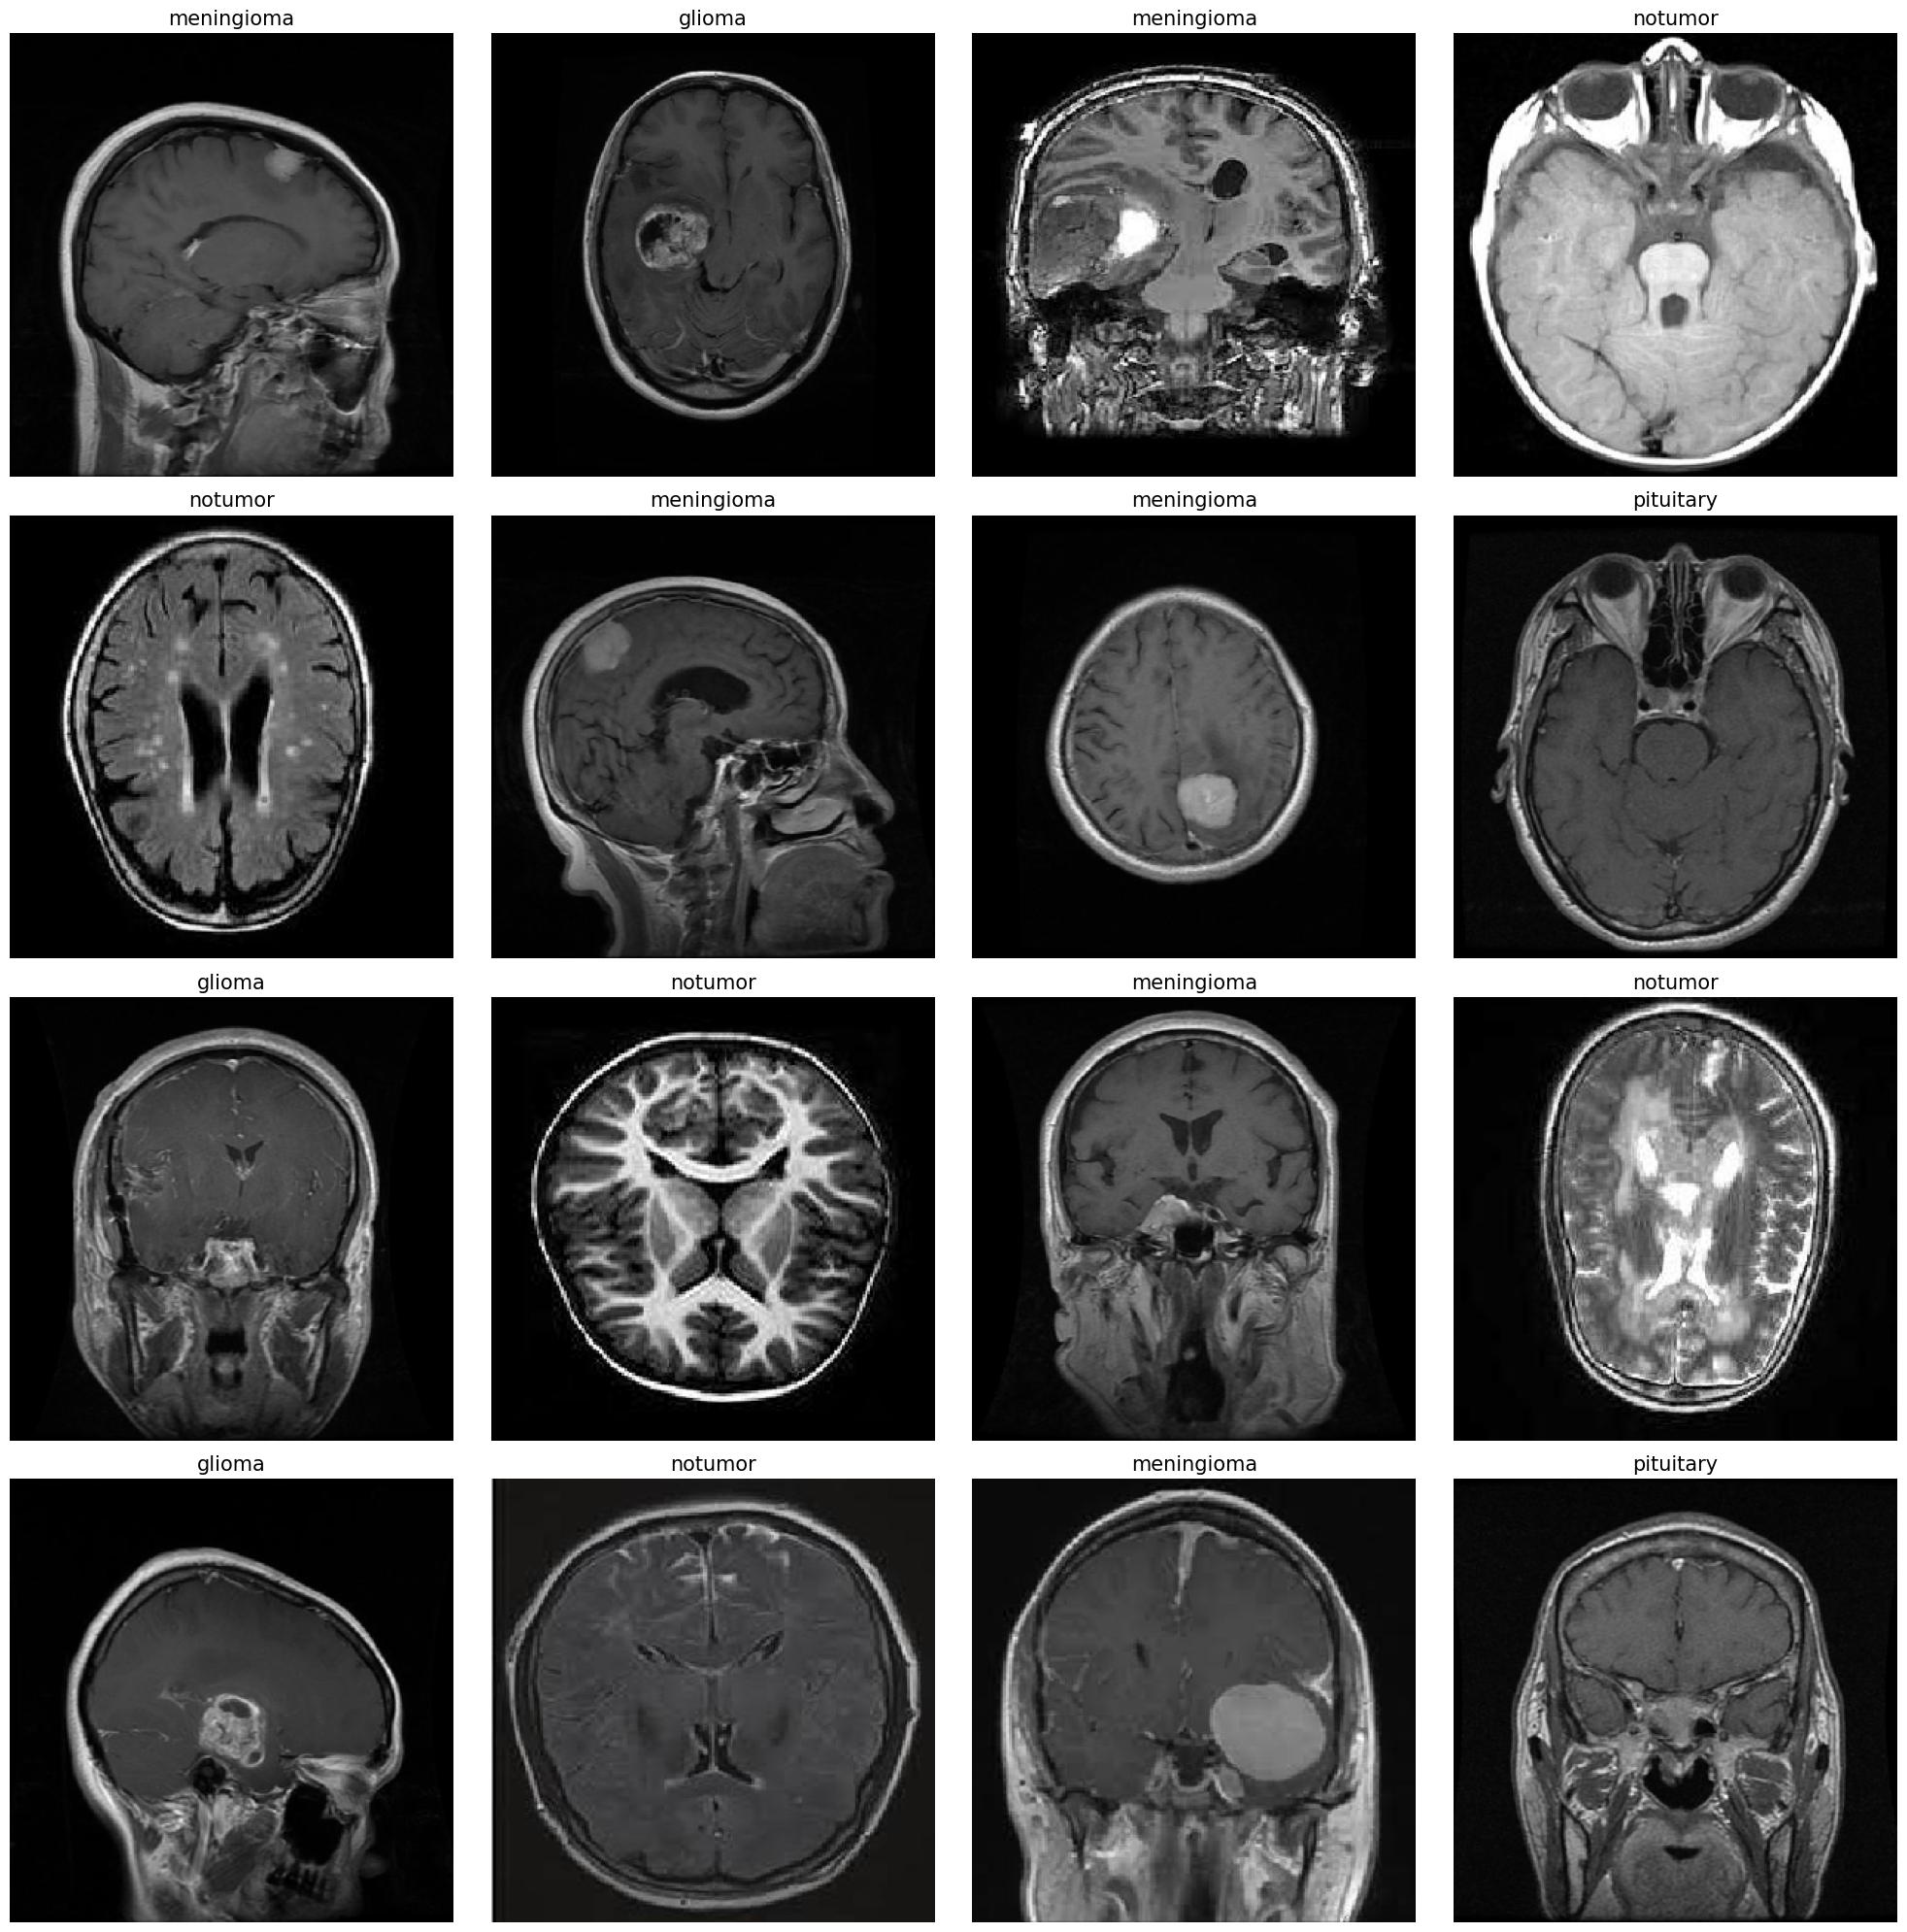

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4, 4, i + 1)

    image_vis = (image + 1.0) / 2.0
    image_vis = np.clip(image_vis, 0, 1)
    plt.imshow(image_vis)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)
    plt.axis('off')

plt.tight_layout()
plt.show()


# Building Deep Learning Model

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Image shape and number of classes
img_shape = (300, 300, 3)
num_classes = 4

# Learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9
)

# Load ResNet50V2 base model
base_model = ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape
)

# Freeze all layers initially
base_model.trainable = True
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze last 30 layers for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True


# Pooling layer outputs
avg_pool = layers.GlobalAveragePooling2D()(base_model.output)
max_pool = layers.GlobalMaxPooling2D()(base_model.output)
concat_pool = layers.Concatenate()([avg_pool, max_pool])

# Fully connected layers (simplified)
x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concat_pool)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

# Output layer
output = layers.Dense(num_classes, activation='softmax')(x)

# Final model
model = tf.keras.Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Add label_smoothing=0.1 if needed
    metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

model.summary()


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 306, 306,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 150, 150,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 152, 152,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 75, 75,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 75, 75,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 75, 75,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 75, 75,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 75, 75,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 75, 75,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 77, 77,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 75, 75,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 75, 75,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 75, 75,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 75, 75,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 75, 75,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 75, 75,    │          0 │ conv2_block1_0_c

 Total params: 27,896,452 (106.42 MB)

 Trainable params: 18,772,868 (71.61 MB)

 Non-trainable params: 9,123,584 (34.80 MB)

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

# Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

hist = model.fit(tr_gen,
                 epochs=1000,
                 validation_data=valid_gen,
                 shuffle= False,
                 callbacks=[early_stopping, checkpoint])


Epoch 1/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 849ms/step - accuracy: 0.6667 - loss: 17.5338 - precision: 0.6929 - recall: 0.6158

179/179 ━━━━━━━━━━━━━━━━━━━━ 196s 933ms/step - accuracy: 0.6673 - loss: 17.5221 - precision: 0.6936 - recall: 0.6166 - val_accuracy: 0.8992 - val_loss: 12.0672 - val_precision: 0.9126 - val_recall: 0.8931
Epoch 2/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.9043 - loss: 11.0876 - precision: 0.9129 - recall: 0.8964

179/179 ━━━━━━━━━━━━━━━━━━━━ 146s 816ms/step - accuracy: 0.9043 - loss: 11.0830 - precision: 0.9130 - recall: 0.8964 - val_accuracy: 0.9389 - val_loss: 8.7996 - val_precision: 0.9403 - val_recall: 0.9374
Epoch 3/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.9435 - loss: 8.3568 - precision: 0.9482 - recall: 0.9384

179/179 ━━━━━━━━━━━━━━━━━━━━ 151s 843ms/step - accuracy: 0.9435 - loss: 8.3546 - precision: 0.9482 - recall: 0.9384 - val_accuracy: 0.9634 - val_loss: 7.1624 - val_precision: 0.9707 - val_recall: 0.9618
Epoch 4/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.9520 - loss: 6.9284 - precision: 0.9556 - recall: 0.9478

179/179 ━━━━━━━━━━━━━━━━━━━━ 149s 831ms/step - accuracy: 0.9520 - loss: 6.9269 - precision: 0.9556 - recall: 0.9478 - val_accuracy: 0.9664 - val_loss: 6.1656 - val_precision: 0.9678 - val_recall: 0.9649
Epoch 5/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.9700 - loss: 5.9440 - precision: 0.9723 - recall: 0.9674

179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 837ms/step - accuracy: 0.9700 - loss: 5.9430 - precision: 0.9723 - recall: 0.9674 - val_accuracy: 0.9695 - val_loss: 5.3953 - val_precision: 0.9694 - val_recall: 0.9664
Epoch 6/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.9761 - loss: 5.1949 - precision: 0.9786 - recall: 0.9745

179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 835ms/step - accuracy: 0.9761 - loss: 5.1940 - precision: 0.9786 - recall: 0.9745 - val_accuracy: 0.9710 - val_loss: 4.6994 - val_precision: 0.9724 - val_recall: 0.9679
Epoch 7/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.9774 - loss: 4.5459 - precision: 0.9795 - recall: 0.9740

179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 839ms/step - accuracy: 0.9773 - loss: 4.5451 - precision: 0.9795 - recall: 0.9740 - val_accuracy: 0.9847 - val_loss: 4.0855 - val_precision: 0.9892 - val_recall: 0.9832
Epoch 8/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 781ms/step - accuracy: 0.9777 - loss: 3.9651 - precision: 0.9796 - recall: 0.9766

179/179 ━━━━━━━━━━━━━━━━━━━━ 151s 842ms/step - accuracy: 0.9777 - loss: 3.9643 - precision: 0.9796 - recall: 0.9766 - val_accuracy: 0.9847 - val_loss: 3.5572 - val_precision: 0.9847 - val_recall: 0.9847
Epoch 9/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.9826 - loss: 3.4404 - precision: 0.9834 - recall: 0.9808

179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 835ms/step - accuracy: 0.9826 - loss: 3.4397 - precision: 0.9834 - recall: 0.9808 - val_accuracy: 0.9969 - val_loss: 3.0593 - val_precision: 0.9969 - val_recall: 0.9969
Epoch 10/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.9834 - loss: 2.9906 - precision: 0.9837 - recall: 0.9830

179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 840ms/step - accuracy: 0.9834 - loss: 2.9900 - precision: 0.9837 - recall: 0.9830 - val_accuracy: 0.9939 - val_loss: 2.6461 - val_precision: 0.9939 - val_recall: 0.9939
Epoch 11/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.9855 - loss: 2.5810 - precision: 0.9863 - recall: 0.9842

179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 836ms/step - accuracy: 0.9855 - loss: 2.5804 - precision: 0.9863 - recall: 0.9842 - val_accuracy: 0.9878 - val_loss: 2.2931 - val_precision: 0.9893 - val_recall: 0.9847
Epoch 12/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.9904 - loss: 2.2135 - precision: 0.9909 - recall: 0.9891

179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 835ms/step - accuracy: 0.9904 - loss: 2.2131 - precision: 0.9909 - recall: 0.9891 - val_accuracy: 0.9954 - val_loss: 1.9591 - val_precision: 0.9954 - val_recall: 0.9954
Epoch 13/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.9884 - loss: 1.9019 - precision: 0.9898 - recall: 0.9882

179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 840ms/step - accuracy: 0.9884 - loss: 1.9015 - precision: 0.9898 - recall: 0.9882 - val_accuracy: 0.9817 - val_loss: 1.7286 - val_precision: 0.9817 - val_recall: 0.9802
Epoch 14/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.9906 - loss: 1.6360 - precision: 0.9908 - recall: 0.9897

179/179 ━━━━━━━━━━━━━━━━━━━━ 149s 835ms/step - accuracy: 0.9906 - loss: 1.6357 - precision: 0.9908 - recall: 0.9897 - val_accuracy: 0.9817 - val_loss: 1.4766 - val_precision: 0.9817 - val_recall: 0.9817
Epoch 15/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.9902 - loss: 1.4039 - precision: 0.9907 - recall: 0.9900

179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 835ms/step - accuracy: 0.9902 - loss: 1.4036 - precision: 0.9907 - recall: 0.9900 - val_accuracy: 0.9847 - val_loss: 1.2703 - val_precision: 0.9862 - val_recall: 0.9847
Epoch 16/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.9903 - loss: 1.2093 - precision: 0.9915 - recall: 0.9897

179/179 ━━━━━━━━━━━━━━━━━━━━ 149s 835ms/step - accuracy: 0.9903 - loss: 1.2090 - precision: 0.9915 - recall: 0.9897 - val_accuracy: 0.9924 - val_loss: 1.0898 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 17/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.9888 - loss: 1.0425 - precision: 0.9888 - recall: 0.9884

179/179 ━━━━━━━━━━━━━━━━━━━━ 149s 835ms/step - accuracy: 0.9888 - loss: 1.0423 - precision: 0.9888 - recall: 0.9884 - val_accuracy: 0.9878 - val_loss: 0.9348 - val_precision: 0.9878 - val_recall: 0.9878
Epoch 18/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.9889 - loss: 0.9008 - precision: 0.9896 - recall: 0.9886

179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 846ms/step - accuracy: 0.9889 - loss: 0.9006 - precision: 0.9896 - recall: 0.9886 - val_accuracy: 0.9939 - val_loss: 0.7935 - val_precision: 0.9939 - val_recall: 0.9939
Epoch 19/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.9948 - loss: 0.7615 - precision: 0.9950 - recall: 0.9941

179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 835ms/step - accuracy: 0.9948 - loss: 0.7613 - precision: 0.9950 - recall: 0.9941 - val_accuracy: 0.9908 - val_loss: 0.6902 - val_precision: 0.9908 - val_recall: 0.9908
Epoch 20/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.9921 - loss: 0.6649 - precision: 0.9923 - recall: 0.9912

179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 835ms/step - accuracy: 0.9921 - loss: 0.6648 - precision: 0.9923 - recall: 0.9912 - val_accuracy: 0.9893 - val_loss: 0.6256 - val_precision: 0.9893 - val_recall: 0.9878
Epoch 21/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.9924 - loss: 0.5814 - precision: 0.9925 - recall: 0.9919

179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 846ms/step - accuracy: 0.9924 - loss: 0.5812 - precision: 0.9925 - recall: 0.9919 - val_accuracy: 0.9939 - val_loss: 0.5130 - val_precision: 0.9939 - val_recall: 0.9939
Epoch 22/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.9936 - loss: 0.4922 - precision: 0.9942 - recall: 0.9935

179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 847ms/step - accuracy: 0.9936 - loss: 0.4921 - precision: 0.9942 - recall: 0.9935 - val_accuracy: 0.9893 - val_loss: 0.4557 - val_precision: 0.9893 - val_recall: 0.9893
Epoch 23/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 796ms/step - accuracy: 0.9891 - loss: 0.4364 - precision: 0.9902 - recall: 0.9888

179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 853ms/step - accuracy: 0.9891 - loss: 0.4363 - precision: 0.9902 - recall: 0.9889 - val_accuracy: 0.9939 - val_loss: 0.3879 - val_precision: 0.9939 - val_recall: 0.9939
Epoch 24/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.9950 - loss: 0.3701 - precision: 0.9950 - recall: 0.9945

179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 846ms/step - accuracy: 0.9949 - loss: 0.3700 - precision: 0.9949 - recall: 0.9945 - val_accuracy: 0.9878 - val_loss: 0.3589 - val_precision: 0.9893 - val_recall: 0.9863
Epoch 25/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.9923 - loss: 0.3297 - precision: 0.9924 - recall: 0.9921

179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 849ms/step - accuracy: 0.9923 - loss: 0.3297 - precision: 0.9924 - recall: 0.9921 - val_accuracy: 0.9893 - val_loss: 0.3343 - val_precision: 0.9893 - val_recall: 0.9893
Epoch 26/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.9878 - loss: 0.3061 - precision: 0.9879 - recall: 0.9874

179/179 ━━━━━━━━━━━━━━━━━━━━ 151s 843ms/step - accuracy: 0.9878 - loss: 0.3060 - precision: 0.9879 - recall: 0.9874 - val_accuracy: 0.9908 - val_loss: 0.2714 - val_precision: 0.9908 - val_recall: 0.9908
Epoch 27/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.9948 - loss: 0.2526 - precision: 0.9948 - recall: 0.9948

179/179 ━━━━━━━━━━━━━━━━━━━━ 149s 835ms/step - accuracy: 0.9948 - loss: 0.2526 - precision: 0.9948 - recall: 0.9948 - val_accuracy: 0.9893 - val_loss: 0.2439 - val_precision: 0.9893 - val_recall: 0.9893
Epoch 28/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 804ms/step - accuracy: 0.9945 - loss: 0.2227 - precision: 0.9948 - recall: 0.9945 - val_accuracy: 0.9832 - val_loss: 0.2577 - val_precision: 0.9832 - val_recall: 0.9832
Epoch 29/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.9933 - loss: 0.2141 - precision: 0.9933 - recall: 0.9932

179/179 ━━━━━━━━━━━━━━━━━━━━ 153s 850ms/step - accuracy: 0.9933 - loss: 0.2140 - precision: 0.9933 - recall: 0.9932 - val_accuracy: 0.9847 - val_loss: 0.2074 - val_precision: 0.9847 - val_recall: 0.9847
Epoch 30/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.9944 - loss: 0.1827 - precision: 0.9944 - recall: 0.9944

179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 848ms/step - accuracy: 0.9944 - loss: 0.1827 - precision: 0.9944 - recall: 0.9944 - val_accuracy: 0.9878 - val_loss: 0.1764 - val_precision: 0.9878 - val_recall: 0.9878
Epoch 31/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 810ms/step - accuracy: 0.9920 - loss: 0.1671 - precision: 0.9920 - recall: 0.9920 - val_accuracy: 0.9847 - val_loss: 0.2061 - val_precision: 0.9847 - val_recall: 0.9847
Epoch 32/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.9966 - loss: 0.1366 - precision: 0.9968 - recall: 0.9966

179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 836ms/step - accuracy: 0.9966 - loss: 0.1366 - precision: 0.9968 - recall: 0.9966 - val_accuracy: 0.9893 - val_loss: 0.1442 - val_precision: 0.9893 - val_recall: 0.9893
Epoch 33/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.9926 - loss: 0.1311 - precision: 0.9926 - recall: 0.9925

179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 840ms/step - accuracy: 0.9926 - loss: 0.1310 - precision: 0.9926 - recall: 0.9925 - val_accuracy: 0.9924 - val_loss: 0.1311 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 34/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 196s 804ms/step - accuracy: 0.9932 - loss: 0.1214 - precision: 0.9932 - recall: 0.9930 - val_accuracy: 0.9924 - val_loss: 0.1329 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 35/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.9919 - loss: 0.1267 - precision: 0.9919 - recall: 0.9916

179/179 ━━━━━━━━━━━━━━━━━━━━ 154s 860ms/step - accuracy: 0.9919 - loss: 0.1267 - precision: 0.9919 - recall: 0.9917 - val_accuracy: 0.9893 - val_loss: 0.1221 - val_precision: 0.9893 - val_recall: 0.9893
Epoch 36/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.9956 - loss: 0.0979 - precision: 0.9958 - recall: 0.9954

179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 846ms/step - accuracy: 0.9956 - loss: 0.0979 - precision: 0.9958 - recall: 0.9954 - val_accuracy: 0.9924 - val_loss: 0.0963 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 37/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 810ms/step - accuracy: 0.9941 - loss: 0.0931 - precision: 0.9946 - recall: 0.9938 - val_accuracy: 0.9863 - val_loss: 0.1106 - val_precision: 0.9863 - val_recall: 0.9863
Epoch 38/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.9981 - loss: 0.0753 - precision: 0.9981 - recall: 0.9981

179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 826ms/step - accuracy: 0.9981 - loss: 0.0753 - precision: 0.9981 - recall: 0.9981 - val_accuracy: 0.9863 - val_loss: 0.0958 - val_precision: 0.9863 - val_recall: 0.9863
Epoch 39/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.9929 - loss: 0.0803 - precision: 0.9935 - recall: 0.9929

179/179 ━━━━━━━━━━━━━━━━━━━━ 149s 834ms/step - accuracy: 0.9929 - loss: 0.0803 - precision: 0.9935 - recall: 0.9929 - val_accuracy: 0.9954 - val_loss: 0.0741 - val_precision: 0.9954 - val_recall: 0.9954
Epoch 40/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.9956 - loss: 0.0702 - precision: 0.9960 - recall: 0.9956

179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 846ms/step - accuracy: 0.9956 - loss: 0.0702 - precision: 0.9960 - recall: 0.9956 - val_accuracy: 0.9924 - val_loss: 0.0725 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 41/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.9959 - loss: 0.0641 - precision: 0.9960 - recall: 0.9959

179/179 ━━━━━━━━━━━━━━━━━━━━ 154s 855ms/step - accuracy: 0.9959 - loss: 0.0641 - precision: 0.9960 - recall: 0.9959 - val_accuracy: 0.9939 - val_loss: 0.0657 - val_precision: 0.9954 - val_recall: 0.9939
Epoch 42/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 805ms/step - accuracy: 0.9964 - loss: 0.0615 - precision: 0.9967 - recall: 0.9963 - val_accuracy: 0.9954 - val_loss: 0.0679 - val_precision: 0.9954 - val_recall: 0.9954
Epoch 43/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 803ms/step - accuracy: 0.9948 - loss: 0.0620 - precision: 0.9948 - recall: 0.9948 - val_accuracy: 0.9924 - val_loss: 0.0678 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 44/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.9909 - loss: 0.0718 - precision: 0.9909 - recall: 0.9906

179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 840ms/step - accuracy: 0.9909 - loss: 0.0718 - precision: 0.9909 - recall: 0.9906 - val_accuracy: 0.9954 - val_loss: 0.0537 - val_precision: 0.9954 - val_recall: 0.9954
Epoch 45/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 804ms/step - accuracy: 0.9971 - loss: 0.0523 - precision: 0.9975 - recall: 0.9971 - val_accuracy: 0.9908 - val_loss: 0.0678 - val_precision: 0.9908 - val_recall: 0.9908
Epoch 46/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 807ms/step - accuracy: 0.9957 - loss: 0.0508 - precision: 0.9957 - recall: 0.9957 - val_accuracy: 0.9893 - val_loss: 0.0642 - val_precision: 0.9893 - val_recall: 0.9893
Epoch 47/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 806ms/step - accuracy: 0.9966 - loss: 0.0454 - precision: 0.9966 - recall: 0.9966 - val_accuracy: 0.9893 - val_loss: 0.0632 - val_precision: 0.9893 - val_recall: 0.9893
Epoch 48/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.9962 - loss: 0.0439 - precision: 0.9962 - recall: 0.9962

179/179 ━━━━━━━━━━━━━━━━━━━━ 151s 841ms/step - accuracy: 0.9962 - loss: 0.0439 - precision: 0.9962 - recall: 0.9962 - val_accuracy: 0.9954 - val_loss: 0.0437 - val_precision: 0.9954 - val_recall: 0.9954
Epoch 49/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 799ms/step - accuracy: 0.9949 - loss: 0.0443 - precision: 0.9950 - recall: 0.9946 - val_accuracy: 0.9908 - val_loss: 0.0639 - val_precision: 0.9908 - val_recall: 0.9908
Epoch 50/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 147s 818ms/step - accuracy: 0.9948 - loss: 0.0498 - precision: 0.9948 - recall: 0.9948 - val_accuracy: 0.9893 - val_loss: 0.0502 - val_precision: 0.9893 - val_recall: 0.9893
Epoch 51/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.9976 - loss: 0.0386 - precision: 0.9978 - recall: 0.9976

179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 839ms/step - accuracy: 0.9976 - loss: 0.0386 - precision: 0.9978 - recall: 0.9976 - val_accuracy: 0.9954 - val_loss: 0.0398 - val_precision: 0.9954 - val_recall: 0.9954
Epoch 52/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 806ms/step - accuracy: 0.9949 - loss: 0.0432 - precision: 0.9953 - recall: 0.9947 - val_accuracy: 0.9969 - val_loss: 0.0458 - val_precision: 0.9969 - val_recall: 0.9969
Epoch 53/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 807ms/step - accuracy: 0.9962 - loss: 0.0426 - precision: 0.9963 - recall: 0.9962 - val_accuracy: 0.9939 - val_loss: 0.0537 - val_precision: 0.9939 - val_recall: 0.9939
Epoch 54/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.9933 - loss: 0.0455 - precision: 0.9944 - recall: 0.9929

179/179 ━━━━━━━━━━━━━━━━━━━━ 151s 845ms/step - accuracy: 0.9933 - loss: 0.0455 - precision: 0.9944 - recall: 0.9929 - val_accuracy: 0.9985 - val_loss: 0.0358 - val_precision: 0.9985 - val_recall: 0.9985
Epoch 55/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.9992 - loss: 0.0262 - precision: 0.9992 - recall: 0.9992

179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 839ms/step - accuracy: 0.9992 - loss: 0.0262 - precision: 0.9992 - recall: 0.9992 - val_accuracy: 0.9985 - val_loss: 0.0317 - val_precision: 0.9985 - val_recall: 0.9985
Epoch 56/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 805ms/step - accuracy: 0.9963 - loss: 0.0300 - precision: 0.9965 - recall: 0.9959 - val_accuracy: 0.9924 - val_loss: 0.0522 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 57/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 807ms/step - accuracy: 0.9954 - loss: 0.0402 - precision: 0.9956 - recall: 0.9950 - val_accuracy: 0.9893 - val_loss: 0.0762 - val_precision: 0.9893 - val_recall: 0.9893
Epoch 58/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 808ms/step - accuracy: 0.9972 - loss: 0.0321 - precision: 0.9972 - recall: 0.9972 - val_accuracy: 0.9939 - val_loss: 0.0408 - val_precision: 0.9939 - val_recall: 0.9939
Epoch 59/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 146s 816ms/step - accuracy: 0.9967 - loss: 0.0279 - precision: 0.9967 - recall: 0.9967 - val_accuracy: 

# Visualize model performance

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

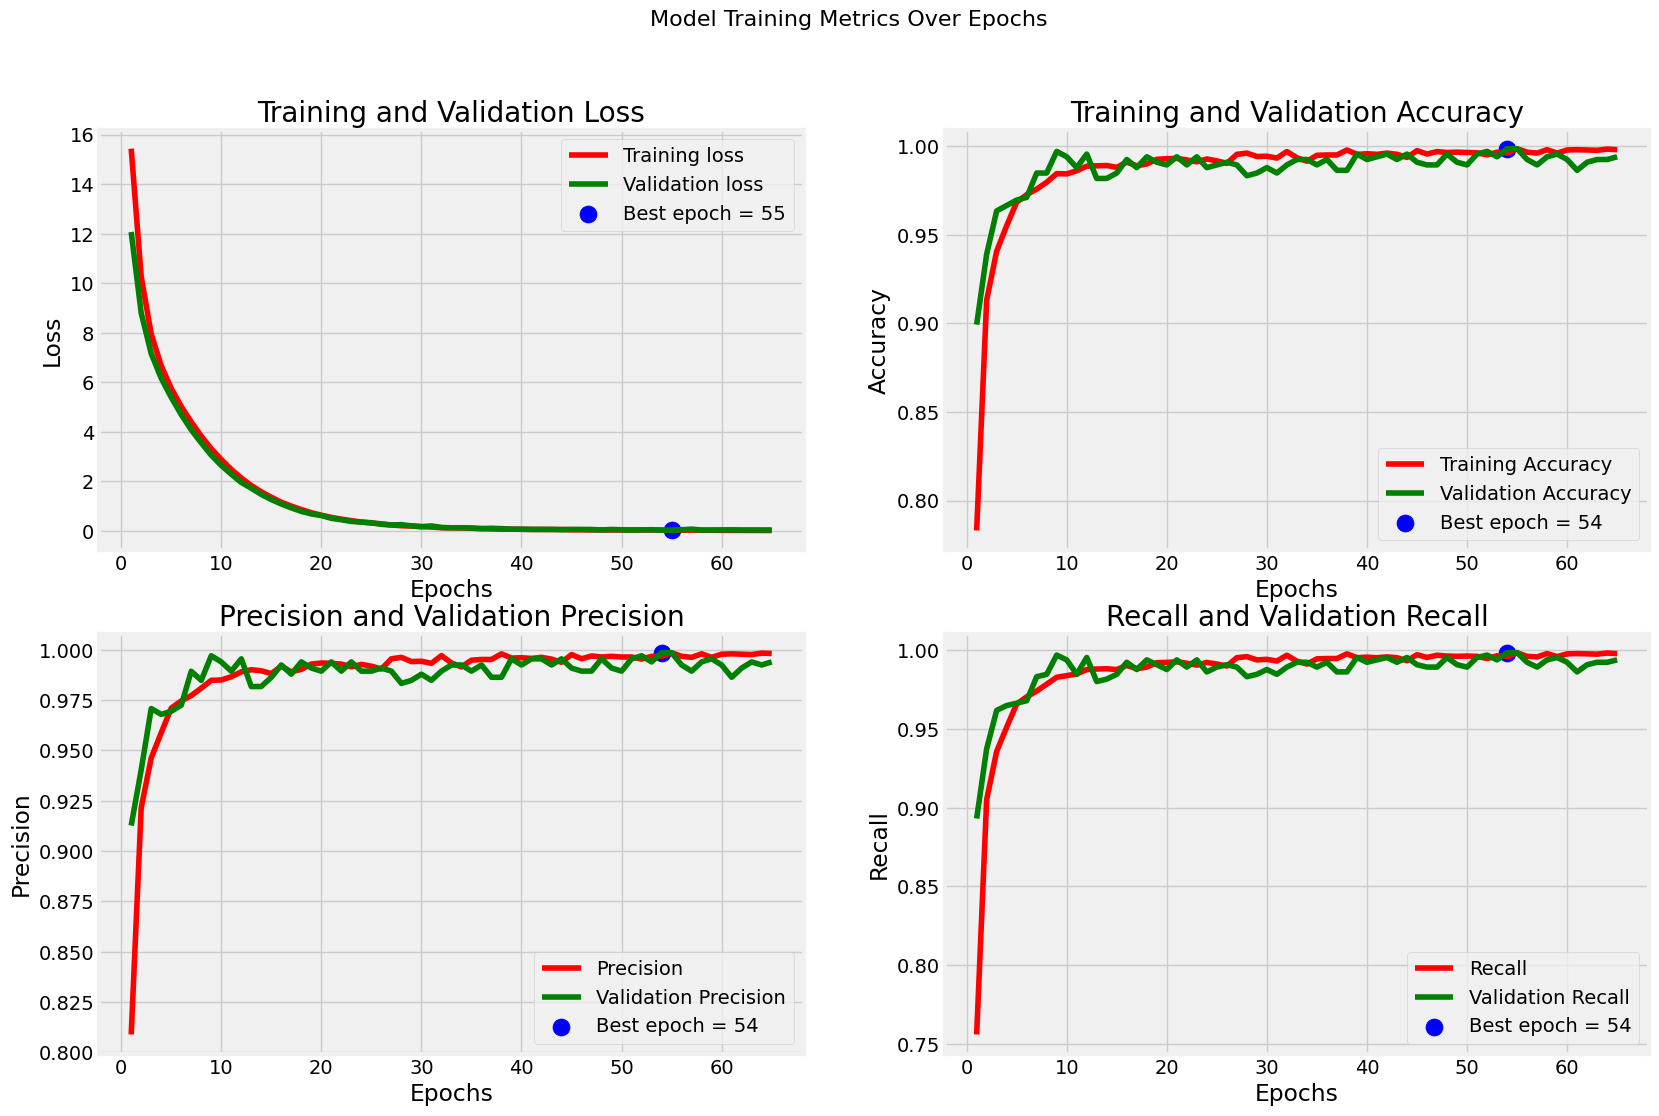

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


# Model Evaluation

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

# the test_score[0] = loss, test_score[1] = accuracy, test_score[2] = precision, test_score[3] = recall
print(test_score)

179/179 ━━━━━━━━━━━━━━━━━━━━ 139s 777ms/step - accuracy: 0.9993 - loss: 0.0242 - precision: 0.9993 - recall: 0.9993
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.9997 - loss: 0.0250 - precision: 0.9997 - recall: 0.9997
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9994 - loss: 0.0249 - precision: 0.9998 - recall: 0.9994
Train Loss: 0.0242
Train Accuracy: 99.91%
--------------------
Validation Loss: 0.0317
Validation Accuracy: 99.85%
--------------------
Test Loss: 0.0386
Test Accuracy: 99.70%
[0.0386057086288929, 0.9969512224197388, 0.9984732866287231, 0.9969512224197388]


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step


# Plotting Confusuion Matrix

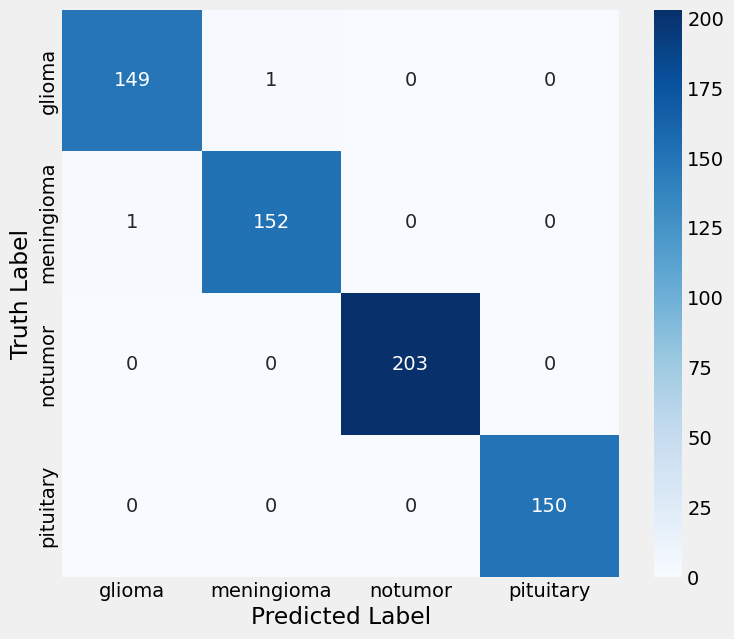

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

# Classification Report

In [ ]:
report = classification_report(ts_gen.classes, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.99      0.99      0.99       153
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       150

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656



# Testing

In [ ]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((300, 300))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


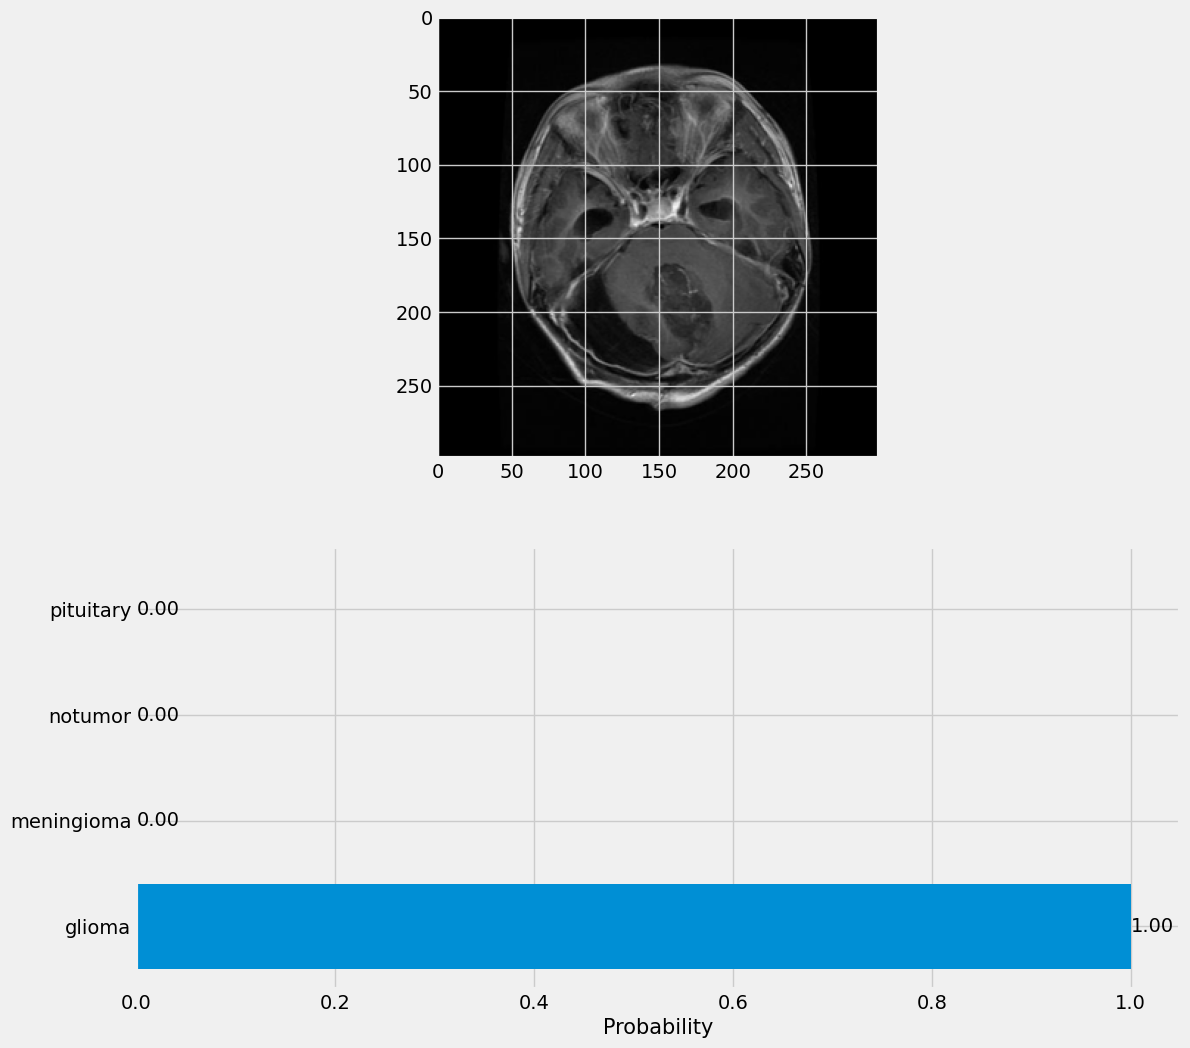

In [ ]:
predict('/content/Testing/glioma/Te-glTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


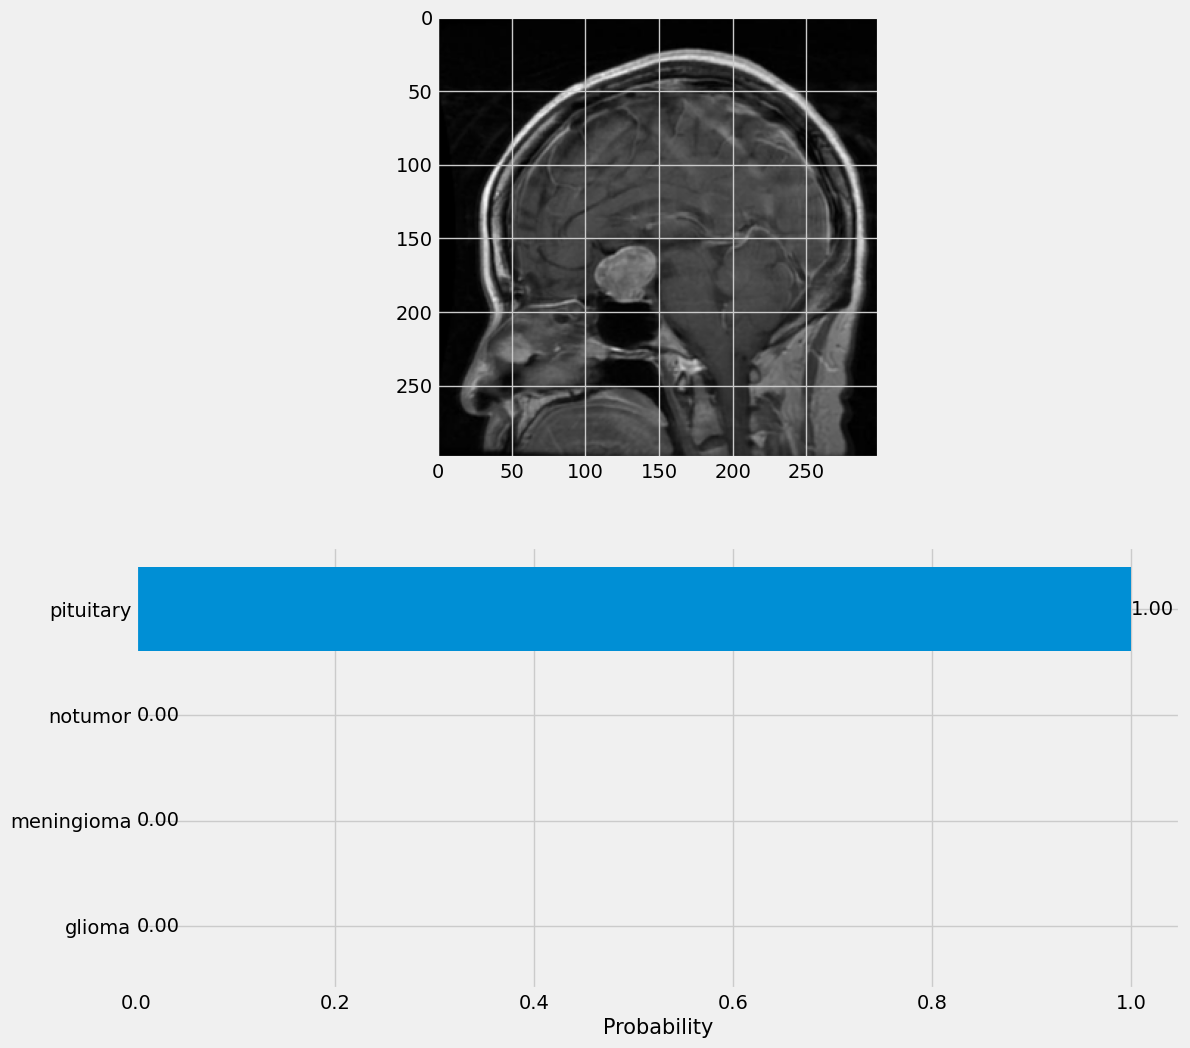

In [ ]:
predict('/content/Testing/pituitary/Te-piTr_0008.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


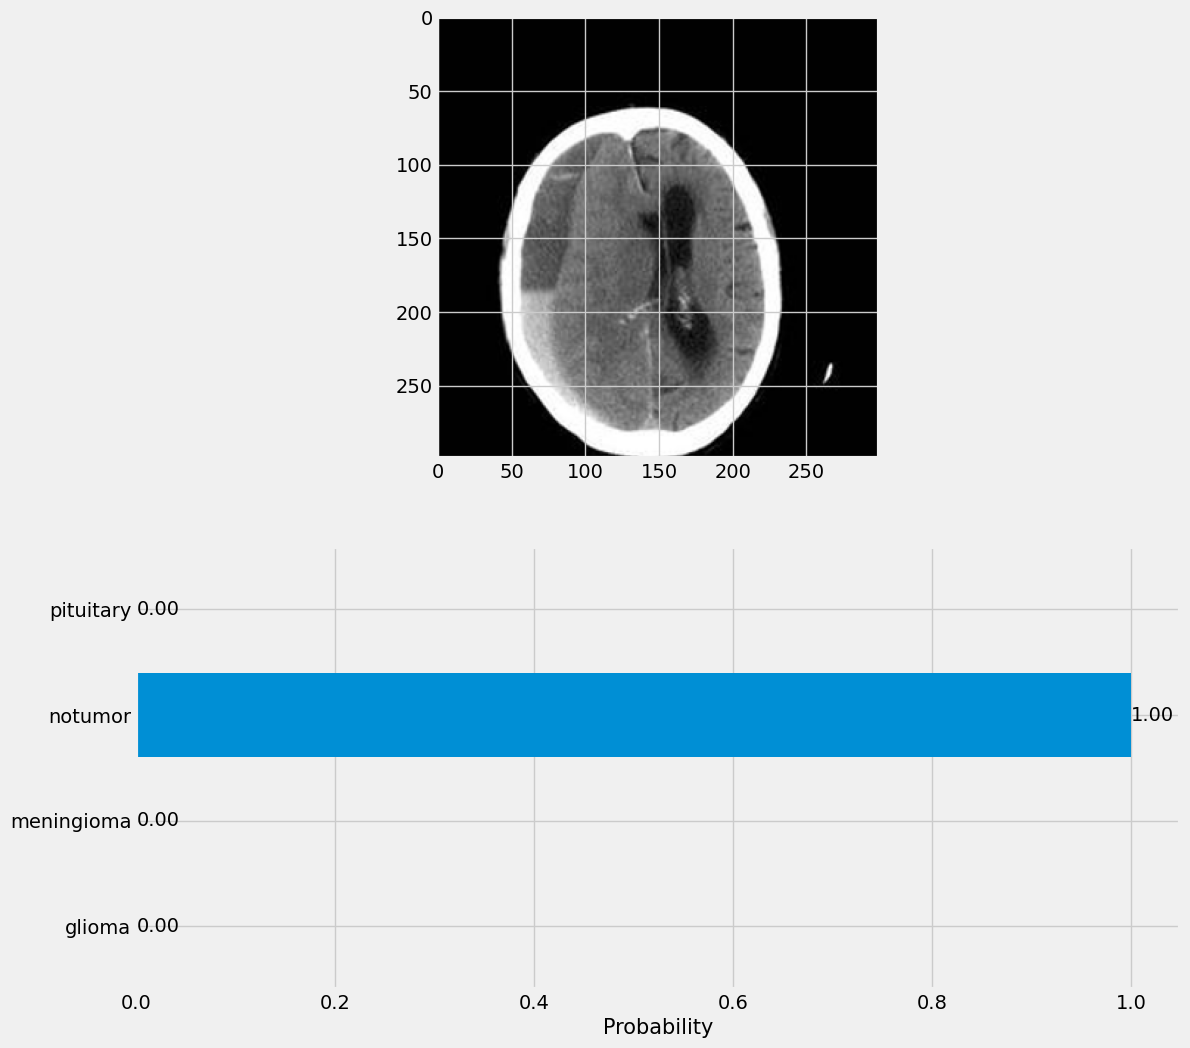

In [ ]:
predict('/content/Testing/notumor/Te-noTr_0000.jpg')